###  Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("E:Kidney-Disease-Analysis/Kidney-Disease-Analysis-main/kidney_disease.csv") #Importing the data file
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Changing the columns names using the text description file

In [3]:
columns = pd.read_csv("E:Kidney-Disease-Analysis/Kidney-Disease-Analysis-main/data_description.txt",sep="-")
columns=columns.reset_index()
columns.columns=["cols","Full_names"]
columns.head()

,cols,Full_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [4]:
data.columns = columns["Full_names"].values
data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Changing the Data Types of Required Columns 

In [5]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [6]:
def convert_dtypes(data,feature):
    data[feature]=pd.to_numeric(data[feature],errors='coerce')
    
features =['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
    convert_dtypes(data,feature) #changing the data types to numeric one of above three columns

In [7]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### Data Cleaning 

In [8]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
def extract_cat_num(data):
    cat_col=[]
    num_col=[]
    for col in data.columns:
        if data[col].dtype=='object':
            cat_col.append(col)
        elif data[col].dtype!='object':
            num_col.append(col)
    return cat_col, num_col


cat_col,num_col=extract_cat_num(data) #To extract numrical and categorical columns 

In [10]:
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, data[col].nunique(),data[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 5 numbers of values i.e. ['yes' 'no' ' yes' '\tno' '\tyes' nan]
 coronary artery disease has 3 numbers of values i.e. ['no' 'yes' '\tno' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 3 numbers of values i.e. ['ckd' 'ckd\t' 'notckd']


In [11]:
#cleaning the data like cleaning yes and no 
data["diabetes mellitus"]= data['diabetes mellitus'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
data["coronary artery disease"]= data['coronary artery disease'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
data['class'] = data['class'].replace(to_replace={'ckd\t':'ckd'})
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, data[col].nunique(),data[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 3 numbers of values i.e. ['yes' 'no' ' yes' nan]
 coronary artery disease has 2 numbers of values i.e. ['no' 'yes' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 2 numbers of values i.e. ['ckd' 'notckd']


In [12]:
data.isna().sum().sort_values(ascending =False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [13]:
def random_value_imputation(data,feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample
    print("The missing values",feature," are ", data[feature].isnull().sum())

#Droping the missing values from the data 
data[num_col].isnull().sum()
for f in num_col:
    random_value_imputation(data,f)

The missing values age  are  0
The missing values blood pressure  are  0
The missing values specific gravity  are  0
The missing values albumin  are  0
The missing values sugar  are  0
The missing values blood glucose random  are  0
The missing values blood urea  are  0
The missing values serum creatinine  are  0
The missing values sodium  are  0
The missing values potassium  are  0
The missing values haemoglobin  are  0
The missing values packed cell volume  are  0
The missing values white blood cell count  are  0
The missing values red blood cell count  are  0


In [14]:
data[cat_col].isnull().sum()
for f in cat_col:
    random_value_imputation(data,f)

The missing values red blood cells  are  0
The missing values  pus cell  are  0
The missing values pus cell clumps  are  0
The missing values bacteria  are  0
The missing values ypertension  are  0
The missing values diabetes mellitus  are  0
The missing values coronary artery disease  are  0
The missing values appetite  are  0
The missing values pedal edema  are  0
The missing values anemia  are  0
The missing values class  are  0


### Data Visualization

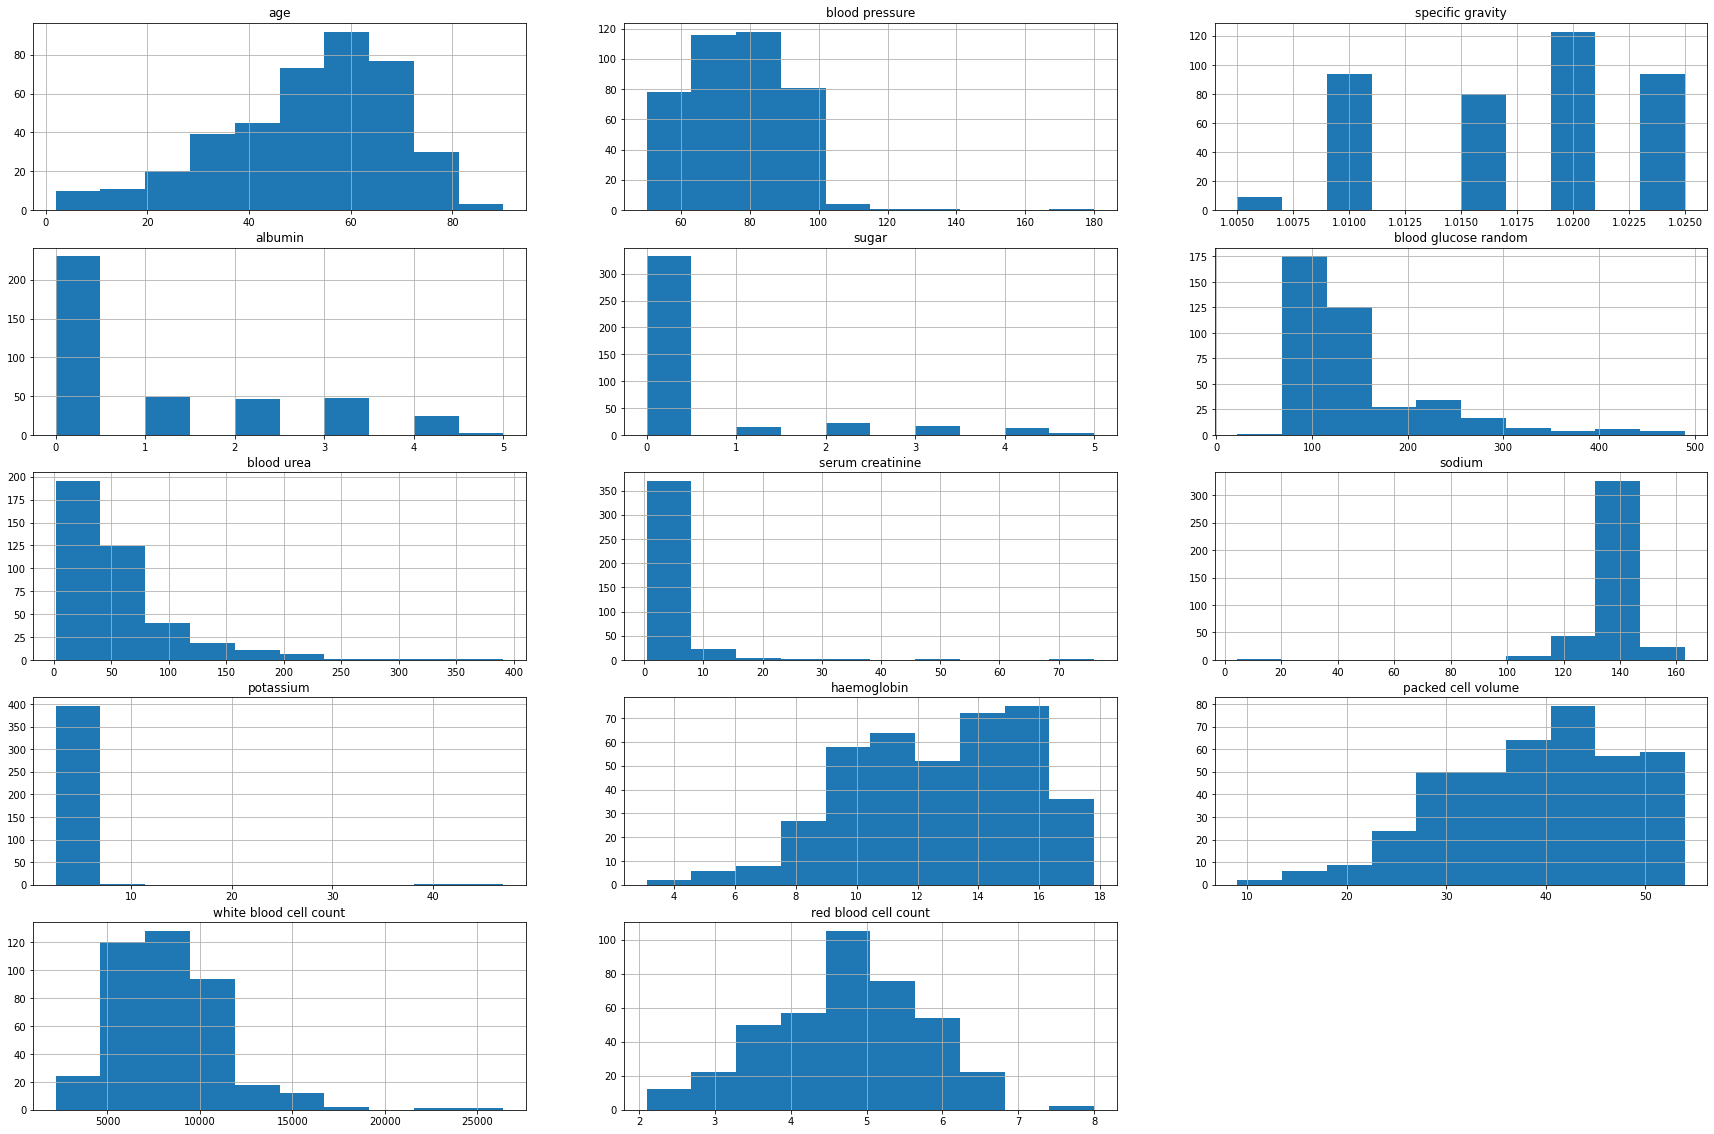

In [15]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

Conclusion 1: The age, sodium, haemoglobin and packed cell volume are little bit left skewed. Means there are some negative / low value outliers
Whereas, white blood cell count, senum creatinine, BP, blood urea and blood glucose are right skewed means it is right means high positive outliers.

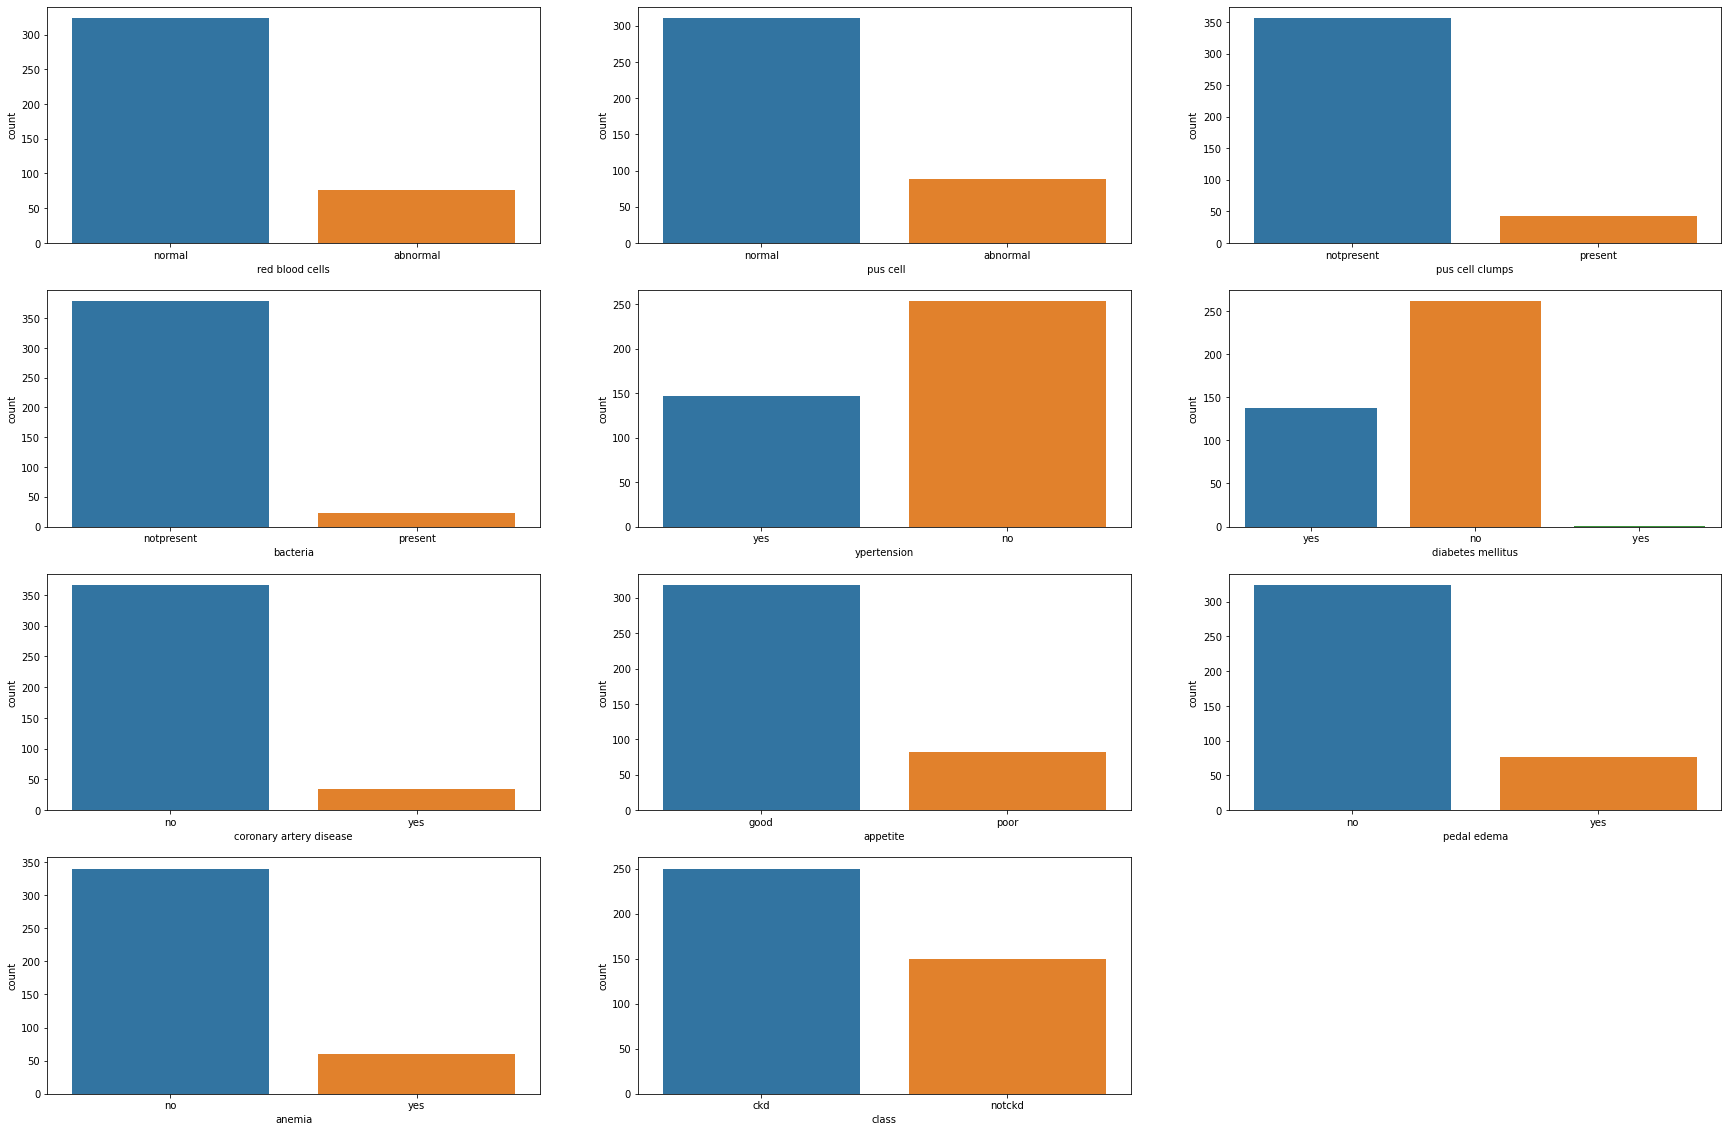

In [16]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data[feature])

Since, the features are having imbalance situations hence, cor-relations are needed to be find. 

<AxesSubplot:>

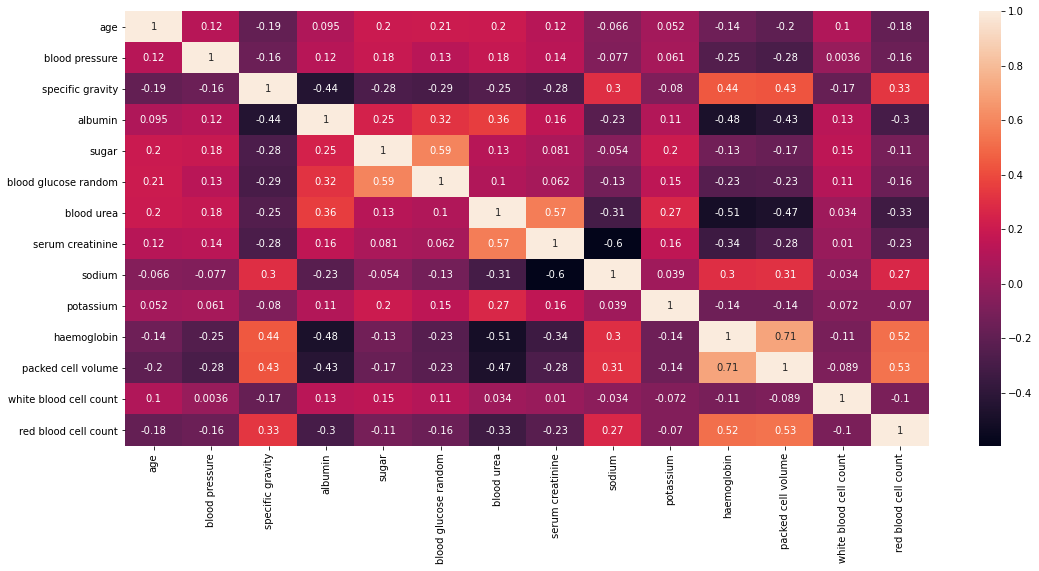

In [17]:
plt.figure(figsize=(18,8)) 
sns.heatmap(data.corr(),annot=True)

In [18]:
#To study the RBC Count with respect to different features grouped with class
Feature_Study = input(" Enter the Feature (Having object dtype preferably) to study with red blood cell count:  ")
for i in data.columns:
    if i==Feature_Study:
        print(data.groupby([i,'class'])['red blood cell count'].agg(['count','mean','median','min','max']), end='\n \n \n')

 Enter the Feature (Having object dtype preferably) to study with red blood cell count:  red blood cells
                        count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        75  4.393333     4.3  2.3  6.4
                notckd      1  5.900000     5.9  5.9  5.9
normal          ckd       175  4.332000     4.2  2.1  8.0
                notckd    149  5.353020     5.3  3.1  6.5
 
 


In [19]:
#To study the WBC Count with respect to different features grouped with class
Feature_Study = input(" Enter the Feature (Having object dtype preferably) to study with white blood cell count:  ")
for i in data.columns:
    if i==Feature_Study:
        print(data.groupby([i,'class'])['white blood cell count'].agg(['count','mean','median','min','max']), end='\n \n \n')

 Enter the Feature (Having object dtype preferably) to study with white blood cell count:  red blood cells
                        count         mean  median     min      max
red blood cells class                                              
abnormal        ckd        75  8338.666667  8600.0  2200.0  16700.0
                notckd      1  5800.000000  5800.0  5800.0   5800.0
normal          ckd       175  8864.571429  8500.0  2200.0  26400.0
                notckd    149  7824.161074  7700.0  4300.0  12800.0
 
 


In [20]:
!pip install tabulate
from tabulate import tabulate

In [21]:
g=[['Name','count','mean','median','min','max']]
for i in data.columns:
    if data[i].dtypes=='float64':
        d=[i, data[i].count(), data[i].mean(), data[i].median(), data[i].min(), data[i].max()]
        g.append(d)      
print(tabulate(g, headers='firstrow'))

Name                      count        mean    median       min        max
----------------------  -------  ----------  --------  --------  ---------
age                         400    51.69        55        2         90
blood pressure              400    76.55        80       50        180
specific gravity            400     1.01749      1.02     1.005      1.025
albumin                     400     0.9825       0        0          5
sugar                       400     0.4325       0        0          5
blood glucose random        400   147.08       121.5     22        490
blood urea                  400    57.673       42        1.5      391
serum creatinine            400     3.08837      1.3      0.4       76
sodium                      400   137.596      138        4.5      163
potassium                   400     4.68225      4.4      2.5       47
haemoglobin                 400    12.601       12.75     3.1       17.8
packed cell volume          400    38.7775      40        9    

### Selecting Best Feature From the List

In [22]:
#Converting the categorical columns to numrical ones 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for col in cat_col:
    data[col]=le.fit_transform(data[col])
data.head()
#0 is ckd and 1 is non ckd

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,297.0,...,38.0,6000.0,5.6,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.6,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [23]:
#Selecting the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [25]:
x=data[ind_col]
y=data[dep_col]

In [26]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_feature.fit(x,y)
ordered_feature.scores_

array([1.17473709e+02, 8.10145874e+01, 5.46290495e-03, 2.20071416e+02,
       8.84165703e+01, 9.95884774e+00, 1.35050375e+01, 2.26992248e+01,
       1.32000000e+01, 2.25082339e+03, 2.32946367e+03, 3.13868174e+02,
       2.85215576e+01, 6.36002243e+00, 1.18942960e+02, 3.48372162e+02,
       8.99398521e+03, 2.00790401e+01, 8.82000000e+01, 1.93699565e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [27]:
data_score=pd.DataFrame(ordered_feature.scores_,columns=['score'])

In [28]:
data_x=pd.DataFrame(x.columns,columns=['feature'])
features_rank=pd.concat([data_x,data_score],axis=1)
features_rank.head()

,feature,score
0,age,117.473709
1,blood pressure,81.014587
2,specific gravity,0.005463
3,albumin,220.071416
4,sugar,88.416570


In [29]:
features_rank['score'].max()

8993.98520642316

In [30]:
features_rank.nlargest(10,'score')

,feature,score
16,white blood cell count,8993.985206
10,blood urea,2329.463673
9,blood glucose random,2250.823389
15,packed cell volume,348.372162
11,serum creatinine,313.868174
3,albumin,220.071416
14,haemoglobin,118.942960
0,age,117.473709
4,sugar,88.416570
18,ypertension,88.200000


In [31]:
selected_columns=features_rank.nlargest(10,'score')['feature'].values
selected_columns

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'packed cell volume', 'serum creatinine', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [32]:
x_new=data[selected_columns]
x_new.head()

,white blood cell count,blood urea,blood glucose random,packed cell volume,serum creatinine,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,36.0,121.0,44.0,1.2,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,297.0,38.0,0.8,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,31.0,1.8,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,32.0,3.8,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,35.0,1.4,2.0,11.6,51.0,0.0,0


In [33]:
len(x_new)

400

In [34]:
x_new.shape

(400, 10)

### Prediction Model

In [35]:
#splitting the dataset to training and testing data 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,random_state=0,test_size=0.25)

In [36]:
ytrain.value_counts() #Balanced Data

0    188
1    112
Name: class, dtype: int64

In [43]:
#Logistic regression model 
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=1)

In [44]:
LR.fit(xtrain,ytrain)

LogisticRegression(random_state=1)

In [45]:
ypred=LR. predict(xtest)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,ypred)

array([[58,  4],
       [ 1, 37]], dtype=int64)

In [47]:
accuracy_score(ytest,ypred)

0.95

In [48]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(ytest, ypred))
print("Precision score:",metrics.precision_score(ytest, ypred))
print("Recall score:",metrics.recall_score(ytest, ypred))
print("F1 Score :",metrics.f1_score(ytest, ypred))

Accuracy score: 0.95
Precision score: 0.9024390243902439
Recall score: 0.9736842105263158
F1 Score : 0.9367088607594938
